<a href="https://colab.research.google.com/github/Praneeth-18/DataMining6/blob/main/Clustering_of_Time_Series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering time series data using pretrained models can be an interesting approach, especially when you have time series data from different sources or categories and want to understand their underlying patterns or groupings. While there are various methods to cluster time series data, one common approach is to use feature extraction techniques to convert time series into a feature space where traditional clustering algorithms can be applied.

In this example, we'll use the tsfresh library to extract features from time series data and then cluster these features using a pretrained model. We'll use a synthetic dataset for demonstration.

In [2]:
pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 15.5 MB/s eta 0:00:00


In [3]:
pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
from tsfresh import extract_features
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(0)
time = np.arange(100)
data = pd.DataFrame(data={
    'id': np.repeat(np.arange(10), 100),
    'time': time.tolist() * 10,
    'value': (np.sin(time / 4) + np.random.normal(0, 0.5, 100)).tolist() * 10
})

In [5]:
# Extract features
extracted_features = extract_features(data, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 10/10 [00:01<00:00,  6.95it/s]


In [7]:
# Assuming you don't have a pretrained model, let's train one
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(extracted_features.fillna(0))

# Predict clusters (in a real scenario, use your pretrained model)
clusters = kmeans.predict(extracted_features.fillna(0))

<ipython-input-7-9619192b29b2>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(extracted_features.fillna(0))


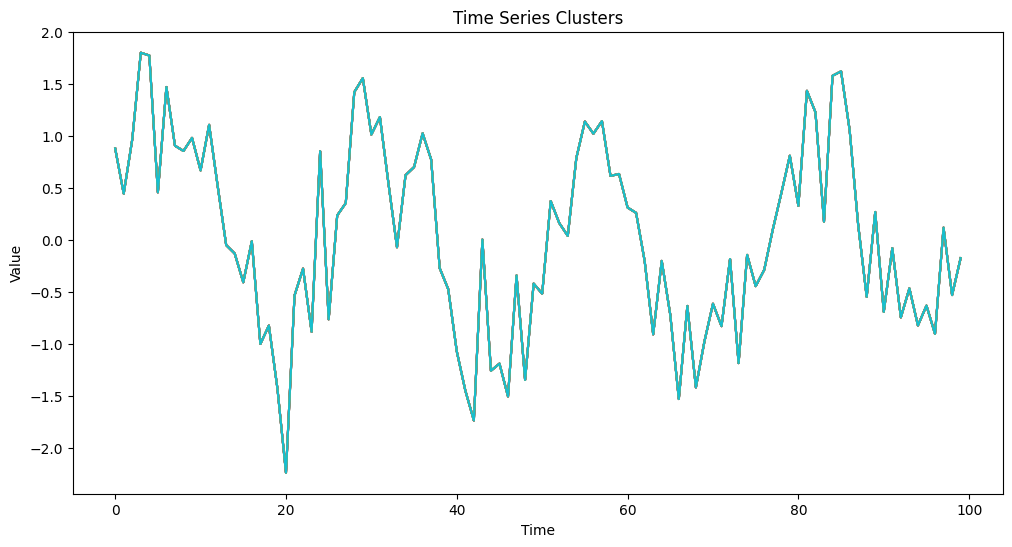

In [8]:
# Add cluster labels to the original data
data['cluster'] = np.repeat(clusters, 100)

# Plotting the time series colored by cluster
plt.figure(figsize=(12, 6))
for cluster in np.unique(data['cluster']):
    subset = data[data['cluster'] == cluster]
    for _, group_data in subset.groupby('id'):
        plt.plot(group_data['time'], group_data['value'], label=f'Cluster {cluster}')

plt.title('Time Series Clusters')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

This example demonstrates how to cluster time series data by extracting features and using a clustering algorithm. The tsfresh library is particularly useful for extracting relevant features from time series data, which can then be fed into traditional clustering algorithms like KMeans. Keep in mind that the quality of clustering heavily depends on the extracted features and the specifics of the pretrained model. The visualization helps in interpreting the clustering results.

# **More Models**

Expanding the clustering of time series data to include more models involves using different feature extraction techniques and clustering algorithms. Let's explore this with two additional models: Hierarchical Clustering and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). We'll continue using the tsfresh library for feature extraction from our synthetic time series data.

In [9]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


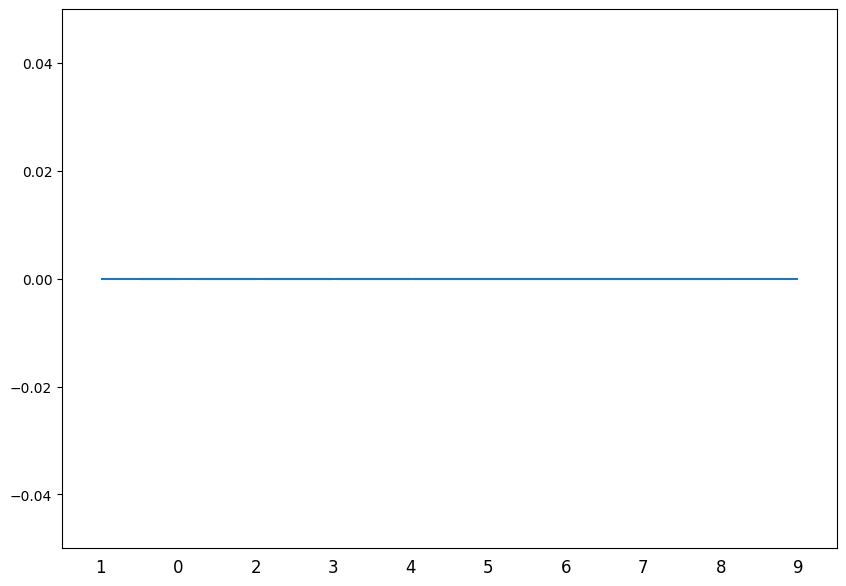

In [10]:
# Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = hierarchical_model.fit_predict(extracted_features.fillna(0))

# Optional: Plotting the Dendrogram
linked = linkage(extracted_features.fillna(0), 'single')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [11]:
# DBSCAN Clustering
dbscan_model = DBSCAN(eps=3, min_samples=2)
dbscan_clusters = dbscan_model.fit_predict(extracted_features.fillna(0))

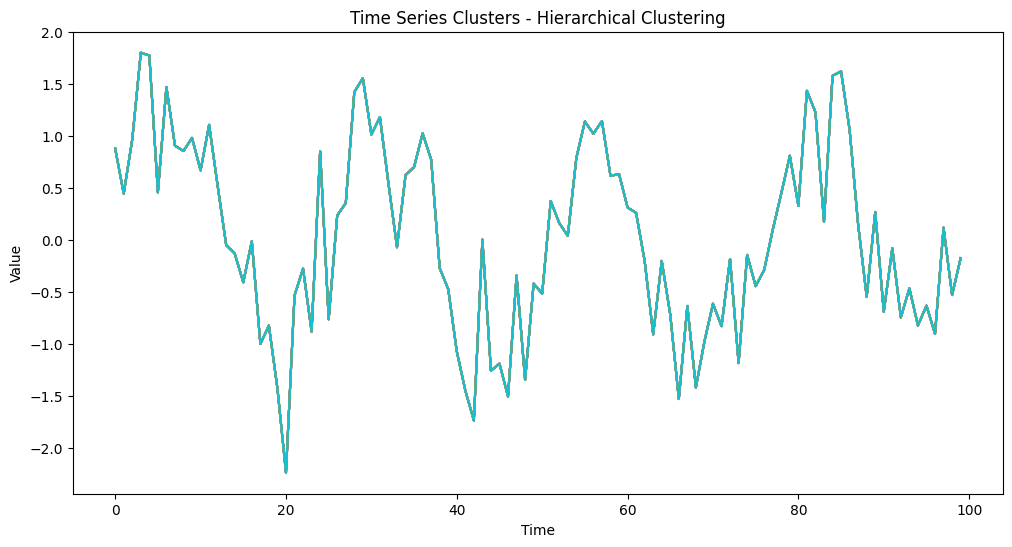

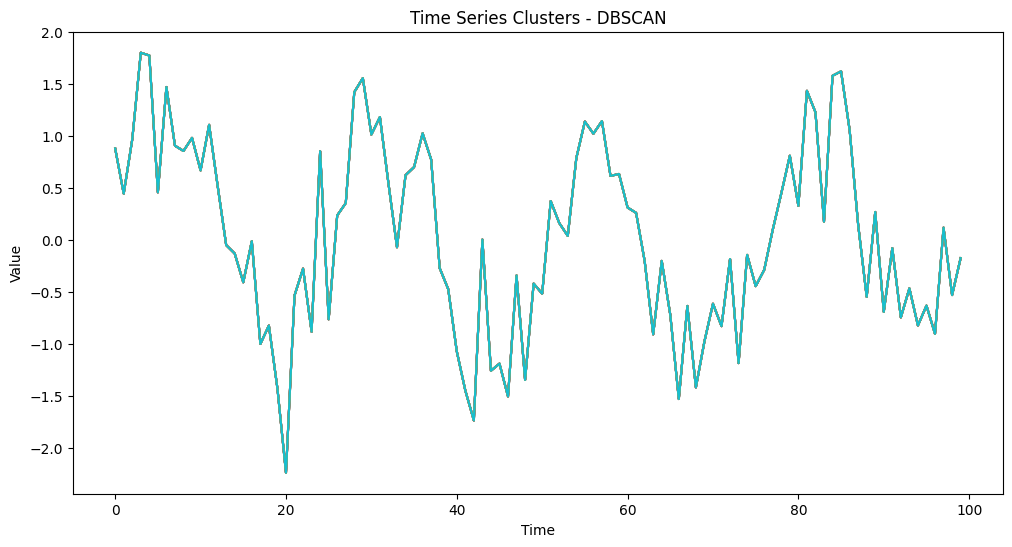

In [12]:
# Function to plot clusters
def plot_clusters(model_name, clusters):
    data['cluster'] = np.repeat(clusters, 100)
    plt.figure(figsize=(12, 6))
    for cluster in np.unique(data['cluster']):
        subset = data[data['cluster'] == cluster]
        for _, group_data in subset.groupby('id'):
            plt.plot(group_data['time'], group_data['value'], label=f'Cluster {cluster}')
    plt.title(f'Time Series Clusters - {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

# Plotting for Hierarchical Clustering
plot_clusters("Hierarchical Clustering", hierarchical_clusters)

# Plotting for DBSCAN
plot_clusters("DBSCAN", dbscan_clusters)

In this expanded approach, we applied Hierarchical Clustering and DBSCAN to the time series data, in addition to KMeans. Each clustering algorithm has its strengths and is suitable for different types of data and clustering objectives:

Hierarchical Clustering: Useful for understanding nested relationships and determining the number of clusters.

DBSCAN: Effective for datasets with clusters of varying densities and for identifying outliers.

The visualization of clusters provides insights into how each algorithm groups the time series data, helping in the interpretation and selection of the most suitable model for your specific needs.